<a href="https://colab.research.google.com/github/Amos0707/ML/blob/main/1_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#step1
# import the Libaries

import pandas as pd
import numpy as np
import matplotlib as pyplot

In [2]:
#step2
#Load the dataset
dt=pd.read_csv('car_price_dataset.csv')

In [4]:
#step3
#DataCleaning
dt.head()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
0,Kia,Rio,2020,4.2,Diesel,Manual,289944,3,5,8501
1,Chevrolet,Malibu,2012,2.0,Hybrid,Automatic,5356,2,3,12092
2,Mercedes,GLA,2020,4.2,Diesel,Automatic,231440,4,2,11171
3,Audi,Q5,2023,2.0,Electric,Manual,160971,2,1,11780
4,Volkswagen,Golf,2003,2.6,Hybrid,Semi-Automatic,286618,3,3,2867


In [5]:
dt.tail()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
9995,Kia,Optima,2004,3.7,Diesel,Semi-Automatic,5794,2,4,8884
9996,Chevrolet,Impala,2002,1.4,Electric,Automatic,168000,2,1,6240
9997,BMW,3 Series,2010,3.0,Petrol,Automatic,86664,5,1,9866
9998,Ford,Explorer,2002,1.4,Hybrid,Automatic,225772,4,1,4084
9999,Volkswagen,Tiguan,2001,2.1,Diesel,Manual,157882,3,3,3342


In [6]:
dt.isnull().sum()

,0
Brand,0
Model,0
Year,0
Engine_Size,0
Fuel_Type,0
Transmission,0
Mileage,0
Doors,0
Owner_Count,0
Price,0


In [7]:
dt.describe()

,Year,Engine_Size,Mileage,Doors,Owner_Count,Price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,2011.543700,3.000560,149239.111800,3.497100,2.991100,8852.96440
std,6.897699,1.149324,86322.348957,1.110097,1.422682,3112.59681
min,2000.000000,1.000000,25.000000,2.000000,1.000000,2000.00000
25%,2006.000000,2.000000,74649.250000,3.000000,2.000000,6646.00000
50%,2012.000000,3.000000,149587.000000,3.000000,3.000000,8858.50000
75%,2017.000000,4.000000,223577.500000,4.000000,4.000000,11086.50000
max,2023.000000,5.000000,299947.000000,5.000000,5.000000,18301.00000


In [8]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         10000 non-null  object 
 1   Model         10000 non-null  object 
 2   Year          10000 non-null  int64  
 3   Engine_Size   10000 non-null  float64
 4   Fuel_Type     10000 non-null  object 
 5   Transmission  10000 non-null  object 
 6   Mileage       10000 non-null  int64  
 7   Doors         10000 non-null  int64  
 8   Owner_Count   10000 non-null  int64  
 9   Price         10000 non-null  int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 781.4+ KB


In [11]:
#Datapreproceesing
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
dt['Brand']=le.fit_transform(dt['Brand'])
dt['Model']=le.fit_transform(dt['Model'])
dt['Transmission']=le.fit_transform(dt['Transmission'])
dt['Fuel_Type']=le.fit_transform(dt['Fuel_Type'])

print(dt)

      Brand  Model  Year  Engine_Size  Fuel_Type  Transmission  Mileage  \
0         6     24  2020          4.2          0             1   289944   
1         2     19  2012          2.0          2             0     5356   
2         7     16  2020          4.2          0             0   231440   
3         0     22  2023          2.0          1             1   160971   
4         9     17  2003          2.6          2             2   286618   
...     ...    ...   ...          ...        ...           ...      ...   
9995      6     20  2004          3.7          0             2     5794   
9996      2     18  2002          1.4          1             0   168000   
9997      1      0  2010          3.0          3             0    86664   
9998      3     13  2002          1.4          2             0   225772   
9999      9     27  2001          2.1          0             1   157882   

      Doors  Owner_Count  Price  
0         3            5   8501  
1         2            3  12092

In [12]:
dt.describe()

,Brand,Model,Year,Engine_Size,Fuel_Type,Transmission,Mileage,Doors,Owner_Count,Price
count,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,4.455000,14.42700,2011.543700,3.000560,1.476100,0.999400,149239.111800,3.497100,2.991100,8852.96440
std,2.880869,8.64429,6.897699,1.149324,1.110834,0.814166,86322.348957,1.110097,1.422682,3112.59681
min,0.000000,0.00000,2000.000000,1.000000,0.000000,0.000000,25.000000,2.000000,1.000000,2000.00000
25%,2.000000,7.00000,2006.000000,2.000000,0.000000,0.000000,74649.250000,3.000000,2.000000,6646.00000
50%,4.000000,14.00000,2012.000000,3.000000,1.000000,1.000000,149587.000000,3.000000,3.000000,8858.50000
75%,7.000000,22.00000,2017.000000,4.000000,2.000000,2.000000,223577.500000,4.000000,4.000000,11086.50000
max,9.000000,29.00000,2023.000000,5.000000,3.000000,2.000000,299947.000000,5.000000,5.000000,18301.00000


<Axes: xlabel='Brand', ylabel='Price'>

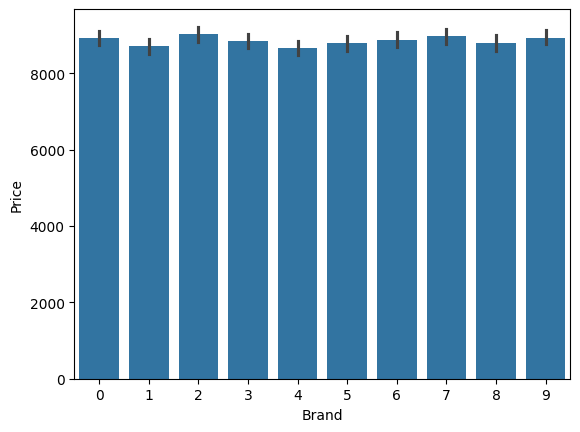

In [15]:
#visualiztion
import seaborn as sns
sns.barplot(x='Brand',y='Price',data=dt)

<Axes: xlabel='Model', ylabel='Price'>

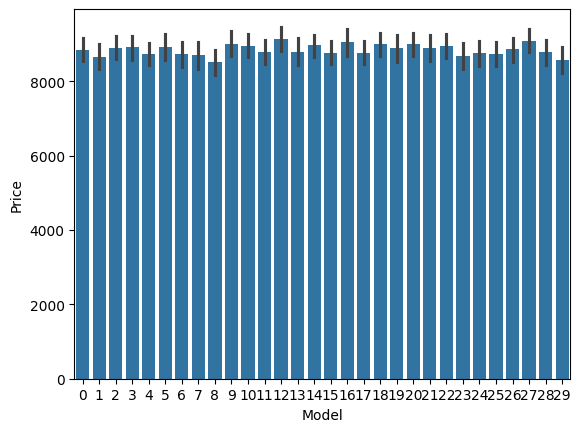

In [16]:
import seaborn as sns
sns.barplot(x='Model',y='Price',data=dt)

In [19]:
# modelbuilding
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=60)

In [22]:
#insalizing the Linearclassification
lr=LinearRegression()




In [23]:
#train the model
lr.fit(x_train,y_train)

LinearRegression()

In [24]:
#prediction
y_pred=lr.predict(x_test)

In [26]:
#Evalute the model
accuracy=r2_score(y_test,y_pred)
print(accuracy)

0.9168365702628163


In [27]:
#mean square
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_pred)
print(mse)

805460.2567067049


In [28]:
#evalute the model
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(y_test,y_pred)
print(mae)

787.958968625623
